<a href="https://colab.research.google.com/github/matro-eugene-jose/COSC110_Matro-Eugene-Jose/blob/main/lab2_titanic_Matro%2CEugene_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Activity 2: Data Cleaning and Analysis using Titanic dataset - Eugene Jose Matro (BSCS 4C)**

### Step 1: Load the Data

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset lab 2/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Understand the Data

In [3]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Note: Each column is correct with their data type though there are some null values.**

### Step 3: Check for Missing Values

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Note: The missing values for columns are:**
1. Cabin (687 null values)
2. Age (177 null values)
3. Embarked (2 null values)

### Step 4: Handle Missing Values

In [5]:
# Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

<ipython-input-5-15693e4d58c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


### Step 5: Remove Duplicates

In [6]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

### Step 6: Fix Data Types

In [7]:
# Convert Survived and Pclass to categorical
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

### Step 7: Standardize Column Names

In [8]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

### Step 8: Save the Cleaned Dataset

In [9]:
df.to_csv("titanic_cleaned.csv", index=False)

---

# Basic Data Visualizations

In [10]:
import matplotlib.pyplot as plt

### Step 1: Bar Plot of Survival Count

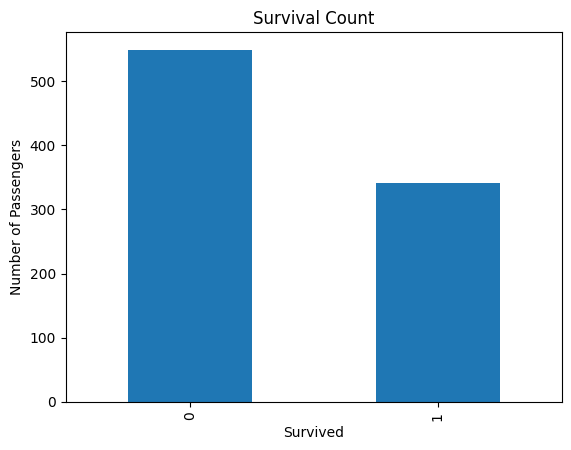

In [11]:
df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

### Step 2: Histogram of Age Distribution

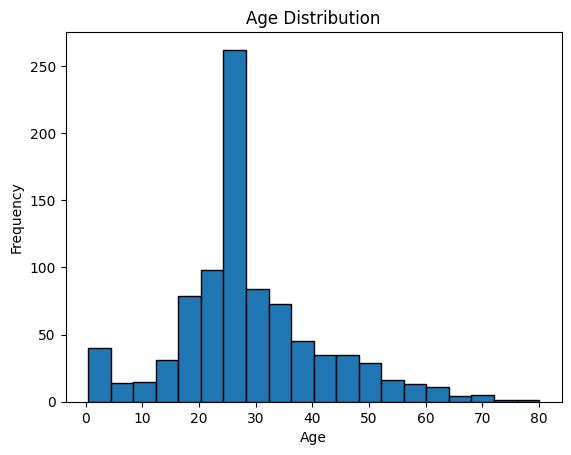

In [12]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

### Step 3: Survival by Gender

In [13]:
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

TypeError: category dtype does not support aggregation 'mean'

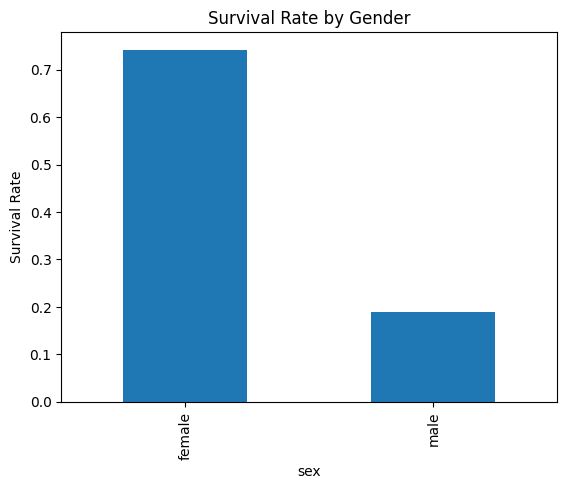

In [14]:
# 'survived' column to numeric (int)
df["survived"] = df["survived"].astype(int)

# 'sex' column to string (object)
df["sex"] = df["sex"].astype(str)

# Previous code
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

# QUESTIONS

### 1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?

##### **Data Cleaning Process: A Step-by-Step Approach**  

1. **Importing the Dataset**  
   - Since the dataset was stored in Google Drive, it was necessary to mount the drive before accessing the file.  
   - The dataset was then loaded into a structured DataFrame using: `pd.read_csv("/content/drive/MyDrive/AAA_datasets/titanic2/train.csv")`


2. **Understanding the Dataset**  
   - The `df.info()` function was used to inspect column names, data types, and any missing values.  
   - **Key Observation:** While most columns had appropriate data types, some contained missing values that needed to be addressed.  

3. **Identifying and Handling Missing Data**  
   - Running `df.isnull().sum()` helped identify missing values in three key columns:  
     - **Cabin** (687 missing values) → The majority of data was missing, making this column unreliable for analysis.  
     - **Age** (177 missing values) → Crucial for survival analysis but required handling due to gaps.  
   - **Decisions Made:**  
     - The `Cabin` column was removed due to excessive missing values: `df.drop(columns=["Cabin"], inplace=True)`

     - Missing values in `Age` were filled with the median value, as it is less affected by outliers than the mean: `df["Age"].fillna(df["Age"].median(), inplace=True)`


4. **Detecting and Removing Duplicates**  
   - Used `df.duplicated().sum()` to check for duplicate rows and removed them with: `df.drop_duplicates(inplace=True)`


5. **Standardizing and Optimizing Data**  
   - Categorical variables (`Survived` and `Pclass`) were converted to the category data type to optimize memory usage:
    - `df["Survived"] = df["Survived"].astype("category")`
    - `df["Pclass"] = df["Pclass"].astype("category")`

   - Standardized column names to lowercase for consistency: `df.columns = df.columns.str.lower()`

6. **Exporting the Cleaned Dataset**  
   - The cleaned DataFrame was saved as a CSV file for further analysis: `df.to_csv("titanic_cleaned.csv", index=False)`


### **Reasoning Behind These Steps:**  
- **Strategic handling of missing values** prevents bias in analysis.  
- **Dropping the `Cabin` column** eliminates unnecessary noise in the dataset.  
- **Optimizing categorical data types** improves performance and efficiency.  
- **Standardizing column names** ensures consistency and reduces potential errors in future processing.  

---

### 2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

##### **1. The Relationship Between Age and Survival (Age Column)**

<ipython-input-15-63173082d954>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["survived"] == 1]["age"], shade=True, label="Survived", color="green")
<ipython-input-15-63173082d954>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["survived"] == 0]["age"], shade=True, label="Did Not Survive", color="red")


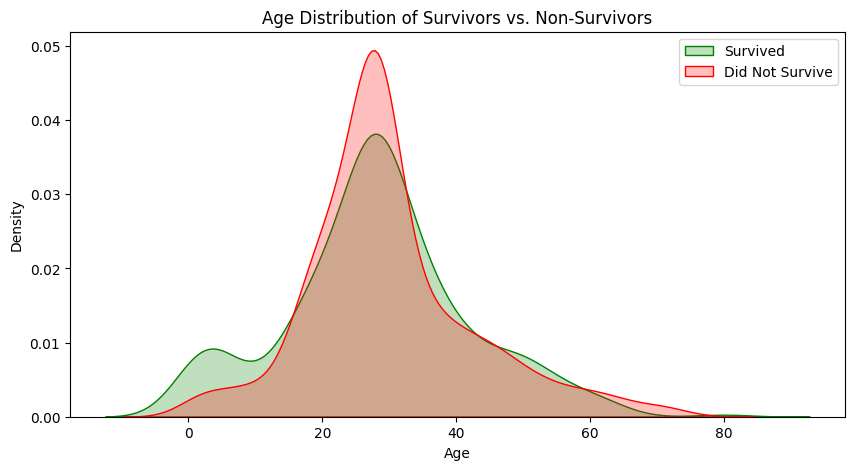

In [15]:
import seaborn as sns

# Create age distribution plot for survivors and non-survivors
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df["survived"] == 1]["age"], shade=True, label="Survived", color="green")
sns.kdeplot(df[df["survived"] == 0]["age"], shade=True, label="Did Not Survive", color="red")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.legend()
plt.show()

**Key Insights from the Data Analysis**  

- **Higher Survival Rates for Children**  
  - Passengers under the age of 15 had a noticeably higher survival rate.  
  - This supports the idea that children were given priority for lifeboats during evacuation.  

- **Lower Survival Rates for Elderly Passengers**  
  - Older passengers had a significantly lower chance of survival.  
  - Mobility challenges and other physical limitations may have contributed to this trend.  

- **Mixed Survival Rates for Adults (20-40 Years)**  
  - The survival rate among adults in this age range varied considerably.  
  - This suggests that factors beyond age—such as gender and passenger class—played a major role in determining survival outcomes.  

##### **2. The Influence of Ticket Fare on Survival (Fare Column)**

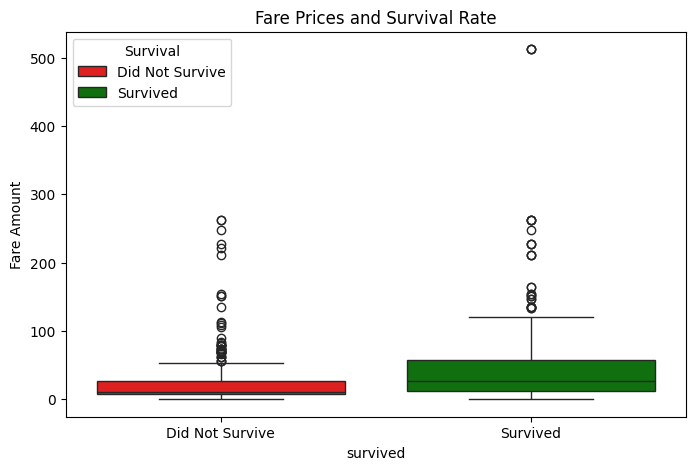

In [18]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="survived", y="fare", data=df, hue="survived", palette={0: "red", 1: "green"})

plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.ylabel("Fare Amount")
plt.title("Fare Prices and Survival Rate")
plt.legend(title="Survival", labels=["Did Not Survive", "Survived"])
plt.show()

**Key Insights from the Fare Analysis**  

- **Survivors Tended to Pay Higher Fares**  
  - On average, passengers who survived had paid higher ticket prices.  
  - This suggests that wealthier individuals may have had better access to lifeboats during the evacuation.  

- **Lower Fare Passengers Had a Lower Survival Rate**  
  - Those in third class, who generally paid the lowest fares, experienced significantly lower survival rates.  
  - This highlights the impact of social class on survival chances.  

- **Outliers Among Wealthy Non-Survivors**  
  - A few high-paying passengers still did not survive.  
  - This indicates that factors beyond wealth—such as cabin location or access to lifeboats—also played a crucial role.  